<a href="https://colab.research.google.com/github/srinijasriram/2216166_AIML_BootCamp_2023/blob/main/KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
df=pd.read_csv("/content/drive/MyDrive/SUV_Purchase.csv")

In [3]:
print(df)

      User ID  Gender  Age  EstimatedSalary  Purchased
0    15624510    Male   19            19000          0
1    15810944    Male   35            20000          0
2    15668575  Female   26            43000          0
3    15603246  Female   27            57000          0
4    15804002    Male   19            76000          0
..        ...     ...  ...              ...        ...
395  15691863  Female   46            41000          1
396  15706071    Male   51            23000          1
397  15654296  Female   50            20000          1
398  15755018    Male   36            33000          0
399  15594041  Female   49            36000          1

[400 rows x 5 columns]


<function matplotlib.pyplot.show(close=None, block=None)>

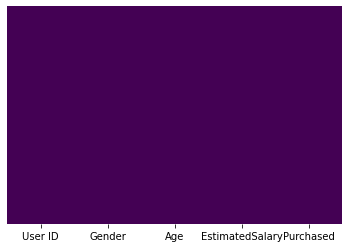

In [4]:
import seaborn as se
import matplotlib.pyplot as plt

def null_values(df):
  plt.figure(figsize=(6,4))
  se.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap="viridis")
  return plt.show

null_values(df)

In [5]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
df.Gender=le.fit_transform(df.Gender)

In [6]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,1,19,19000,0
1,15810944,1,35,20000,0
2,15668575,0,26,43000,0
3,15603246,0,27,57000,0
4,15804002,1,19,76000,0


In [7]:
df=df.drop(['User ID','Gender'],axis=1)

In [8]:
x=df.iloc[:,:-1].values
y=df.iloc[:,-1:].values


In [9]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [10]:
from sklearn.preprocessing import StandardScaler
sst=StandardScaler()
X_train=sst.fit_transform(X_train)
X_test=sst.transform(X_test)

**build model**

In [12]:
from sklearn.neighbors import KNeighborsClassifier
knn_model=KNeighborsClassifier(n_neighbors=20)

In [13]:
knn_model.fit(X_train,Y_train)

/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


KNeighborsClassifier(n_neighbors=20)

In [14]:
ypred=knn_model.predict(X_test)

In [16]:
print("predicted value for training data : ",knn_model.score(X_train,Y_train))
print("predicted value for testing data : ",knn_model.score(X_test,Y_test))
print("predicted value for overall data : ",knn_model.score(sst.transform(x),y))

predicted value for training data :  0.903125
predicted value for testing data :  0.95
predicted value for overall data :  0.9125


/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.9/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for exam

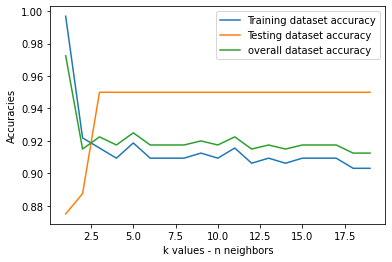

In [19]:
import numpy as np
neighbors = np.arange(1,20)
train_accuracy=np.empty(len(neighbors))
test_accuracy=np.empty(len(neighbors))
overall_accuracy=np.empty(len(neighbors))
#Loop over K values
for i,k in enumerate(neighbors):
  knn=KNeighborsClassifier(n_neighbors=k)
  knn.fit(X_train,Y_train)

  #Compute the training and testing accuracy of ML model
  train_accuracy[i]=knn.score(X_train,Y_train)
  test_accuracy[i]=knn.score(X_test,Y_test)

  #overall score
  overall_accuracy[i]=knn.score(sst.transform(x),y)

import matplotlib.pyplot as plt
plt.plot(neighbors,train_accuracy,label='Training dataset accuracy')
plt.plot(neighbors,test_accuracy,label='Testing dataset accuracy')
plt.plot(neighbors,overall_accuracy,label='overall dataset accuracy')
plt.legend()
plt.xlabel('k values - n neighbors')
plt.ylabel("Accuracies")
plt.show()